In [1]:
# Install packages
# Pkg.add("DataFrames")
# Pkg.add("Gadfly")
# Pkg.add("Plots")

In [2]:
using DataFrames, Gadfly, Plots

In [3]:

accepted_2015 = readtable("data/accepted_2015.csv", nrows=421100); # 421100 is entire dataset


In [12]:
length(accepted_2015[:loan_status])

421

In [13]:
accepted_2015

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
1,NA,NA,20000,20000,20000,36 months,6.49%,612.89,A,A2,"TEAM LEAD, QUALITY ENGINEER",6 years,MORTGAGE,55000.0,Not Verified,Dec-15,Current,n,NA,NA,debt_consolidation,Debt consolidation,381xx,TN,29.15,0,Sep-94,0,74,NA,9,0,4851,23.80%,23,w,9369.66,9369.66,12239.77,12239.77,10630.34,1609.43,0.0,0.0,0.0,Sep-17,612.89,Oct-17,Sep-17,0,NA,1,INDIVIDUAL,NA,NA,NA,0,0,205155,1,3,1,4,3,36812,79,1,1,2776,62,20400,1,0,3,5,25644,9924,21.9,0,0,87,255,8,3,1,8,NA,3,NA,0,1,3,2,9,8,5,14,3,9,0,0,0,2,95.7,0.0,0,0,247433,41663,12700,46367,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,10000,10000,10000,36 months,11.48%,329.67,B,B5,Paralegal,2 years,RENT,33000.0,Not Verified,Dec-15,Current,n,NA,NA,debt_consolidation,Debt consolidation,477xx,IN,21.75,0,Aug-09,0,NA,12,12,1,8052,35.60%,20,w,4586.07,4586.07,6888.44,6888.44,5413.93,1474.51,0.0,0.0,0.0,Sep-17,329.67,Oct-17,Sep-17,0,NA,1,INDIVIDUAL,NA,NA,NA,0,0,23197,1,4,0,0,28,15145,56,2,6,2715,47,22600,0,0,1,6,1933,12925,37.9,0,0,52,76,5,5,0,5,NA,2,NA,0,6,7,6,10,4,8,16,7,12,0,0,0,2,100.0,33.3,0,1,49732,23197,20800,27132,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,NA,21000,21000,21000,60 months,13.99%,488.53,C,C4,Resident physician,< 1 year,RENT,52000.0,Source Verified,Dec-15,Current,n,NA,NA,credit_card,Credit card refinancing,441xx,OH,14.47,0,Jan-05,1,NA,NA,5,0,20374,87.40%,15,w,15546.37,15546.37,9852.21,9852.21,5453.63,4398.58,0.0,0.0,0.0,Sep-17,488.53,Oct-17,Sep-17,0,NA,1,INDIVIDUAL,NA,NA,NA,0,0,372407,1,1,1,1,5,352033,NA,0,0,9358,87,23300,1,0,2,1,74481,2926,87.4,0,0,76,131,85,5,0,85,NA,0,NA,0,3,3,4,4,11,4,4,3,5,0,0,0,1,100.0,75.0,0,0,370357,372407,23300,347057,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,N,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,24000,24000,24000,60 months,9.80%,507.58,B,B3,NA,n/a,OWN,77900.0,Not Verified,Dec-15

In [14]:
# Exploratory graphs?
# Feature transformations?


hardship_flag = accepted_2015[:hardship_flag]
d = Dict()
for i = 1 : length(hardship_flag)
    if haskey(d, hardship_flag[i])
        d[hardship_flag[i]] += 1
    else
        d[hardship_flag[i]] = 1 
    end
end
println(d)

Dict{Any,Any}(Pair{Any,Any}("Y", 3),Pair{Any,Any}("N", 418))


In [15]:
isna(Null)

LoadError: [91mUndefVarError: Null not defined[39m

In [16]:
# features that might help

# dti = debt-to-income ratio

In [7]:
"""compute summary statistics on observed values in data array"""
function summary_stats(arr::DataArray)
    clean_arr = dropna(arr)
    print("missing: $(mean(isna.(arr)))%\n")
    print("maximum: $(maximum(clean_arr))\n")
    print("minimum: $(minimum(clean_arr))\n")
    print("median:  $(median(clean_arr))\n")
    print("mean:    $(mean(clean_arr))\n")
    print("std:     $(std(clean_arr))\n")
end

summary_stats

In [8]:
mths = accepted_2015[:annual_inc];
summary_stats(mths)

missing: 9.498953927698712e-6%
maximum: 9.5e6
minimum: 0.0
median:  65000.0
mean:    76965.60866260582
std:     73949.96146864929


In [23]:
grade = accepted_2015[:grade];
summary_stats(grade)

missing: 0.0%


In [26]:
hardship = accepted_2015[:hardship_flag];
summary_stats(hardship)

missing: 0.0%


In [27]:
installment = accepted_2015[:installment];
summary_stats(installment)

missing: 0.0%


In [19]:
debt_to_inc_ratio = accepted_2015[:dti];
delinq_2yrs = accepted_2015[:delinq_2yrs]

421-element DataArrays.DataArray{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 ⋮
 0
 1
 0
 0
 0
 0
 1
 0
 0
 2
 0
 0

In [13]:
summary_stats(debt_to_inc_ratio)

missing: 2.3747328425552126e-5%
maximum: 999.0
minimum: 0.0
median:  18.87
mean:    19.386234771664014
std:     10.002454521511348


In [14]:
cnt = 0
for i = 1 : length(delinq_2yrs)
    if isna(delinq_2yrs[i])
        cnt += 1
    end

end
println(cnt)

0

In [15]:
summary_stats(delinq_2yrs)

missing: 0.0%
maximum: 15
minimum: 0
median:  0.0
mean:    0.3448112087390169
std:     0.9115498396907951


In [16]:
# Decisions about the project: 
# GOAL -- predict lateness out of just using the accepted. there's not enough data from the 
# rejected to do a good job there. (Or even predict earliness -- the ones that are Fully Paid instead of just Current)
# Maybe loans that are likely to be paid back early should be given lower interest rates to
# entice people to take on loans

# SPIN THIS AS:'there could be human bias that is causing humans to accept loan applications
# that won't be paid back on time. This system will fix that. (Aka maybe there's something
# that humans miss, which is understandable because they don'tt have infinite time to
# review the applications.)

# impute the rows with NAs so I don't have to throw them out

# feature transformations to convert useful text features --> numerical features

In [4]:
# pie chart of 
#println(accepted_2015[:term])
term_of_loan = accepted_2015[:term]
int_term_of_loan = []
num_36 = 0
num_60 = 0
for i = 1 : length(term_of_loan)
    #push!(int_term_of_loan, parse(Int64, split(term_of_loan[i])[1]))
    if split(term_of_loan[i])[1] == "36"
        num_36 += 1
    elseif split(term_of_loan[i])[1] == "60"
        num_60 += 1
    end

end
# println(int_term_of_loan[1:100])
pie(["36 months", "60 months"],[num_36, num_60])

LoadError: [91mMethodError: no method matching split(::DataArrays.NAtype)[0m
Closest candidates are:
  split([91m::T<:SubString[39m, [91m::Any[39m; limit, keep) where T<:SubString at strings/util.jl:253
  split([91m::AbstractString[39m) at strings/util.jl:302
  split([91m::T<:AbstractString[39m, [91m::Any[39m; limit, keep) where T<:AbstractString at strings/util.jl:277[39m

[226, 41884]
String["JOINT", "INDIVIDUAL"]



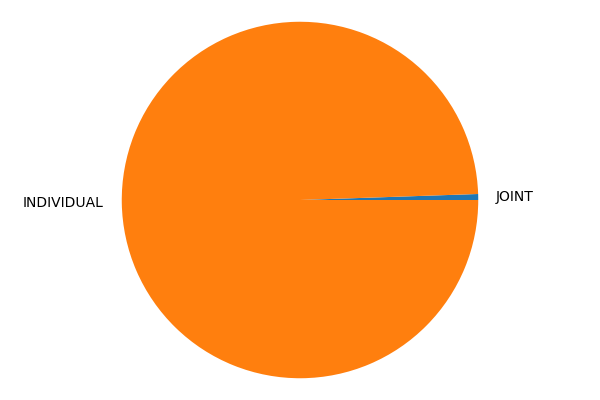

In [18]:
# Invididual or joint
application_type = accepted_2015[:application_type]
d = Dict()
for i = 1 : length(application_type)
    if haskey(d, application_type[i])
        d[application_type[i]] += 1
    else
        d[application_type[i]] = 1 
    end
end
pie_values = Int64[]
pie_labels = String[]
for key = keys(d)
    #println("$key: $(dict[key])")
    push!(pie_labels, key)
    push!(pie_values, d[key])
end
println(pie_values)
println(pie_labels)
# println(int_term_of_loan[1:100])
# pie(["36 months", "60 months"],[num_36, num_60])
pie(pie_labels, pie_values)

In [19]:
#d = Dict()


[143111, 64, 211830, 5708, 7668, 51062, 1652]
String["Fully Paid", "Default", "Current", "In Grace Period", "Late (31-120 days)", "Charged Off", "Late (16-30 days)"]



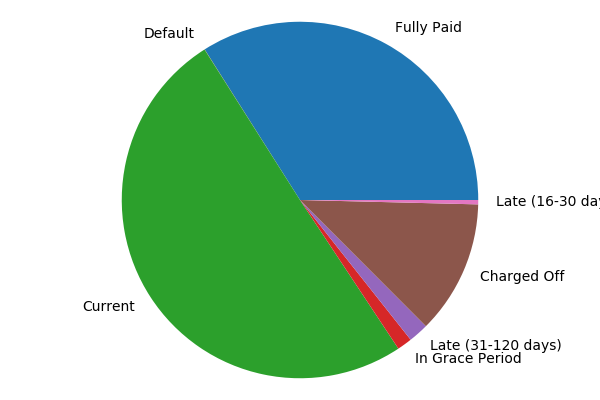

In [6]:
# Loan status (what we're trying to predict)

loan_status = accepted_2015[:loan_status]
d = Dict()
for i = 1 : length(loan_status)
    if isna(loan_status[i]) 
        abcdef = 1
    elseif haskey(d, loan_status[i])
        d[loan_status[i]] += 1
    else
        d[loan_status[i]] = 1 
    end
end
pie_values = Int64[]
pie_labels = String[]
for key = keys(d)
    #println("$key: $(dict[key])")
    push!(pie_labels, key)
    push!(pie_values, d[key])
end
println(pie_values)
println(pie_labels)
# println(int_term_of_loan[1:100])
# pie(["36 months", "60 months"],[num_36, num_60])
pie(pie_labels, pie_values)

In [21]:
# now try perceptron algorithm
# Pkg.add("MLLabelUtils")
# using MLLabelUtils


In [22]:
#Scikit-learn api has imputer type
# median imputation is also a good option

# For now, I'll just remove rows with an NA in any of the features I'm using
names(accepted_2015)

137-element Array{Symbol,1}:
 :id                                        
 :member_id                                 
 :loan_amnt                                 
 :funded_amnt                               
 :funded_amnt_inv                           
 :term                                      
 :int_rate                                  
 :installment                               
 :grade                                     
 :sub_grade                                 
 :emp_title                                 
 :emp_length                                
 :home_ownership                            
 ⋮                                          
 :hardship_status                           
 :deferral_term                             
 :hardship_amount                           
 :hardship_start_date                       
 :hardship_end_date                         
 :payment_plan_start_date                   
 :hardship_length                           
 :hardship_dpd            

In [23]:
data_a = accepted_2015[:loan_amnt]
data_b = accepted_2015[:annual_inc]
data_c = accepted_2015[:dti]
old_data_d = accepted_2015[:earliest_cr_line] # need to do string processing on this, Oct-94 --> 94, Sept-01 ->101  
old_data_e = accepted_2015[:term] # need to do string processing on this 36 months --> 36, 60 months --> 60
old_data_f = accepted_2015[:int_rate] # need to convert from 16.78% --> 0.1678 or 16.78
data_g = accepted_2015[:loan_status]

data_e = Int64[]
for i = 1 : length(old_data_e)
    push!(data_e, parse(Int64, split(old_data_e[i])[1])) 
end
data_d = Int64[]
for i = 1 : length(old_data_d)
    year = parse(Int64, split(old_data_d[i],"-")[2])
    if year <= 17 # 20XX
        year = 2000 + year
    else
        year = 1900 + year
    end
    push!(data_d, year) 
end

data_f = Float64[]
for i = 1 : length(old_data_f)
    push!(data_f, parse(Float64, split(old_data_f[i], "%")[1]))
end


In [24]:
qwerty = "17.9%"
println(split(qwerty,"%"))

SubString{String}["17.9", ""]


In [25]:
new_data_a = []
new_data_b = []
new_data_c = []
new_data_d = []
new_data_e = []
new_data_f = []
new_data_g = []

for i = 1 : length(data_a)
    if !isna(data_a[i]) && !isna(data_b[i]) && !isna(data_c[i])  && !isna(data_d[i]) && !isna(data_e[i]) && !isna(data_f[i]) && !isna(data_g[i])
        push!(new_data_a, data_a[i])
        push!(new_data_b, data_b[i])
        push!(new_data_c, data_c[i])
        push!(new_data_d, data_d[i])
        push!(new_data_e, data_e[i])
        push!(new_data_f, data_f[i])
        push!(new_data_g, data_g[i])
    end
end

In [26]:
length(new_data_a)

42109

In [27]:
# floor(3.1)
# round(3.1)
# Int(3.1)
floor(Int, 1.2)

1

In [60]:
# Train/test split
train_percent = 0.7
train_a = new_data_a[1:floor(Int, train_percent * length(new_data_a))]
test_a = new_data_a[floor(Int, train_percent * length(new_data_a)) + 1:length(new_data_a)]

train_b = new_data_b[1:floor(Int, train_percent * length(new_data_a))]
test_b = new_data_b[floor(Int, train_percent * length(new_data_a)) + 1:length(new_data_a)]

train_c = new_data_c[1:floor(Int, train_percent * length(new_data_a))]
test_c = new_data_c[floor(Int, train_percent * length(new_data_a)) + 1:length(new_data_a)]

train_d = new_data_d[1:floor(Int, train_percent * length(new_data_a))]
test_d = new_data_d[floor(Int, train_percent * length(new_data_a)) + 1:length(new_data_a)]

train_e = new_data_e[1:floor(Int, train_percent * length(new_data_a))]
test_e = new_data_e[floor(Int, train_percent * length(new_data_a)) + 1:length(new_data_a)]

train_f = new_data_f[1:floor(Int, train_percent * length(new_data_a))]
test_f = new_data_f[floor(Int, train_percent * length(new_data_a)) + 1:length(new_data_a)]

train_g = new_data_g[1:floor(Int, train_percent * length(new_data_a))]
test_g = new_data_g[floor(Int, train_percent * length(new_data_a)) + 1:length(new_data_a)]


12633-element Array{Any,1}:
 "Fully Paid"        
 "Current"           
 "Fully Paid"        
 "Current"           
 "Fully Paid"        
 "Current"           
 "Charged Off"       
 "Fully Paid"        
 "Current"           
 "Current"           
 "Fully Paid"        
 "Current"           
 "Current"           
 ⋮                   
 "Fully Paid"        
 "Current"           
 "Current"           
 "Current"           
 "Current"           
 "Current"           
 "Late (31-120 days)"
 "Fully Paid"        
 "Current"           
 "Fully Paid"        
 "Fully Paid"        
 "Fully Paid"        

In [61]:
# features = Matrix(30000, 6)
features = Matrix(length(train_a), 6)

29476×6 Array{Any,2}:
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
   ⋮                                       ⋮   
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  #undef
 #undef  #undef  #

In [62]:
println("test")
features[:,1] = train_a
println("test")
features[:,2] = train_b 
features[:,3] = train_c
features[:,4] = train_d
features[:,5] = train_e
features[:,6] = train_f

println(length(test_a))
println(length(train_g))
labels = Vector(length(train_a))
labels = train_g



X = features
y = labels

test
test
12633
29476


29476-element Array{Any,1}:
 "Current"    
 "Current"    
 "Current"    
 "Current"    
 "Fully Paid" 
 "Charged Off"
 "Current"    
 "Fully Paid" 
 "Current"    
 "Fully Paid" 
 "Fully Paid" 
 "Fully Paid" 
 "Fully Paid" 
 ⋮            
 "Current"    
 "Fully Paid" 
 "Fully Paid" 
 "Fully Paid" 
 "Current"    
 "Current"    
 "Current"    
 "Current"    
 "Current"    
 "Charged Off"
 "Current"    
 "Fully Paid" 

In [63]:
# Julia packages to try:
# DecisionTrees
# GLM (has logistic regression)
# SVM
# scikit learn


In [86]:
# Pkg.add("DecisionTree")
# Pkg.add("RDatasets")
using RDatasets: dataset
using DecisionTree
# Pkg.add("MLBase")
using MLBase, DecisionTree
using RDatasets, Distributions

In [87]:
# Now try one of these

In [88]:
# https://github.com/bensadeghi/DecisionTree.jl

In [89]:
# code won't run..

# CODE ADAPTED FROM: https://github.com/bensadeghi/DecisionTree.jl
# train full-tree classifier
model = build_tree(labels, features)
# prune tree: merge leaves having >= 90% combined purity (default: 100%)
model = prune_tree(model, 0.9)
# pretty print of the tree, to a depth of 5 nodes (optional)
print_tree(model, 5)
# apply learned model
println("****")
println(apply_tree(model, [test_a[1], test_b[1], test_c[1], test_d[1], test_e[1], test_f[1]]))
println("****")
# get the probability of each label
println(apply_tree_proba(model, [test_a[1], test_b[1], test_c[1], test_d[1], test_e[1], test_f[1]], ["Fully Paid", "Default", "Current", "In Grace Period", "Late (31-120 days)", "Charged Off", "Late (16-30 days)"]))
println("****")
# run n-fold cross validation for pruned tree,
# using 90% purity threshold pruning, and 3 CV folds
accuracy = nfoldCV_tree(labels, features, 0.9, 3)

Feature 6, Threshold 11.99
L-> Feature 6, Threshold 8.49
    L-> Feature 6, Threshold 7.26
        L-> Feature 4, Threshold 1993.0
            L-> Feature 6, Threshold 6.24
                L-> 
                R-> 
            R-> Feature 3, Threshold 16.95
                L-> 
                R-> 
        R-> Feature 5, Threshold 60.0
            L-> Feature 3, Threshold 5.35
                L-> 
                R-> 
            R-> Feature 3, Threshold 7.67
                L-> 
                R-> 
    R-> Feature 5, Threshold 60.0
        L-> Feature 3, Threshold 24.05
            L-> Feature 2, Threshold 34506.0
                L-> 
                R-> 
            R-> Feature 2, Threshold 59613.0
                L-> 
                R-> 
        R-> Feature 3, Threshold 18.93
            L-> Feature 3, Threshold 18.83
                L-> 
                R-> 
            R-> Feature 3, Threshold 29.56
                L-> 
                R-> 
R-> Feature 6, Threshold 16.55
    L->

7×7 Array{Int64,2}:
 126   536  0   251   25   3   39
 536  3388  1  1571  118  25  136
   0     2  0     1    0   0    0
 265  1484  1   724   69  12   87
  29    87  0    44    3   0    6
   4    14  0     5    1   0    2
  36   118  0    64    3   0    9


Fold 1
Classes:  String["Charged Off", "Current", "Default", "Fully Paid", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
Matrix:   
Accuracy: 0.43256997455470736
Kappa:    0.020436459150446604


7×7 Array{Int64,2}:
 154   487  1   232   22   2   47
 558  3363  3  1565  119  21  145
   0     3  0     1    0   0    1
 258  1496  1   784   53   7   60
  19    93  0    56    3   0   10
   3    19  0     6    1   0    2
  38   110  1    66    5   0   10


Fold 2
Classes:  String["Charged Off", "Current", "Default", "Fully Paid", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
Matrix:   
Accuracy: 0.43908396946564887
Kappa:    0.03455390195308502


7×7 Array{Int64,2}:
 152   498  0   257   24   0   37
 592  3363  2  1550  117  19  147
   0     2  0     1    0   0    0
 263  1452  2   778   64   8   75
  20    98  0    43    4   0    6
   8    16  0     6    0   0    1
  39   120  0    49    7   1    4


Fold 3
Classes:  String["Charged Off", "Current", "Default", "Fully Paid", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
Matrix:   
Accuracy: 0.43776081424936386
Kappa:    0.03383488916452872

Mean Accuracy: 0.4364715860899067


3-element Array{Float64,1}:
 0.43257 
 0.439084
 0.437761

In [90]:
# train random forest classifier
# using 2 random features, 10 trees, 0.5 portion of samples per tree (optional), and a maximum tree depth of 6 (optional)
model = build_forest(labels, features, 2, 10, 0.5, 6)
# apply learned model
println("****")
println(apply_forest(model, [test_a[1], test_b[1], test_c[1], test_d[1], test_e[1], test_f[1]]))
println("****")
# get the probability of each label
println(apply_forest_proba(model, [test_a[1], test_b[1], test_c[1], test_d[1], test_e[1], test_f[1]], ["Fully Paid", "Default", "Current", "In Grace Period", "Late (31-120 days)", "Charged Off", "Late (16-30 days)"]))
println("****")
# run n-fold cross validation for forests
# using 2 random features, 10 trees, 3 folds and 0.5 of samples per tree (optional)
accuracy = nfoldCV_forest(labels, features, 2, 10, 3, 0.5)

****
Current
****
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
****


7×7 Array{Int64,2}:
  57   685  0   198  1  0  0
 125  4419  0  1205  4  0  3
   0     3  0     2  0  0  0
  49  2012  1   638  1  1  5
   4   128  0    41  0  0  0
   1    24  0    12  0  0  0
  10   145  0    49  1  0  1


Fold 1
Classes:  String["Charged Off", "Current", "Default", "Fully Paid", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
Matrix:   
Accuracy: 0.5206106870229008
Kappa:    0.03194925693085385


7×7 Array{Int64,2}:
  54   729  0   205  0  0  3
 109  4524  0  1141  3  0  8
   0     2  0     0  0  0  0
  56  1908  0   627  3  0  3
   6   134  0    31  0  0  0
   1    19  0     9  0  0  0
  10   199  0    41  0  0  0


Fold 2
Classes:  String["Charged Off", "Current", "Default", "Fully Paid", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
Matrix:   
Accuracy: 0.5297709923664122
Kappa:    0.04406163713829436


7×7 Array{Int64,2}:
  57   684  0   220  0  0  1
 118  4469  0  1205  3  0  3
   0     2  0     2  0  0  0
  55  1952  0   629  0  0  2
   5   126  0    45  0  1  0
   1    16  0     5  0  0  0
  10   163  0    51  0  0  0


Fold 3
Classes:  String["Charged Off", "Current", "Default", "Fully Paid", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
Matrix:   
Accuracy: 0.5246819338422392
Kappa:    0.03662584441885588

Mean Accuracy: 0.5250212044105175


3-element Array{Float64,1}:
 0.520611
 0.529771
 0.524682

In [91]:
# Pkg.update()
# Pkg.add("SVM") # <-- didn't work
# using SVM

Pkg.add("LIBSVM")
using LIBSVM

INFO: Package LIBSVM is already installed
INFO: METADATA is out-of-date — you may not have the latest version of LIBSVM
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [92]:
# model = svm(X[:,train], Y[train])
# model = svm(features, labels)

model = svmtrain(features[:, :], labels[:]);


LoadError: [91mSize of second dimension of training instance matrix
(6) does not match length of labels
(29476)[39m

In [93]:
model = fit!(SVC(), features[:,:], labels[:])


LoadError: [91mUndefVarError: fit! not defined[39m

In [101]:
features = convert(Matrix{Float64}, features)



# train random forest classifier
# using 2 random features, 10 trees, 0.5 portion of samples per tree (optional), and a maximum tree depth of 6 (optional)
model = build_forest(labels, features, 2, 10, 0.5, 6)
# apply learned model
println("****")
println(apply_forest(model, [test_a[1], test_b[1], test_c[1], test_d[1], test_e[1], test_f[1]]))
println("****")
# get the probability of each label
println(apply_forest_proba(model, [test_a[1], test_b[1], test_c[1], test_d[1], test_e[1], test_f[1]], ["Fully Paid", "Default", "Current", "In Grace Period", "Late (31-120 days)", "Charged Off", "Late (16-30 days)"]))
println("****")
# run n-fold cross validation for forests
# using 2 random features, 10 trees, 3 folds and 0.5 of samples per tree (optional)
accuracy = nfoldCV_forest(labels, features, 2, 10, 3, 0.5)


# # Train Set Error
# matches = 0
# not_matches = 0
# for 



****
Current
****
[0.1, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0]
****


7×7 Array{Int64,2}:
  52   703  1   229  1  0  0
 118  4437  1  1186  4  0  4
   0     2  0     0  0  0  0
  48  1983  0   612  1  0  2
   5   126  0    42  0  0  0
   0    23  0    12  0  0  0
  12   175  0    46  0  0  0


Fold 1
Classes:  String["Charged Off", "Current", "Default", "Fully Paid", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
Matrix:   
Accuracy: 0.5191857506361324
Kappa:    0.029755052205438295


7×7 Array{Int64,2}:
  54   684  0   209  1  0  2
 117  4471  1  1210  1  1  8
   0     3  0     1  0  0  0
  68  1938  0   629  1  0  1
   7   136  0    30  0  0  0
   4    18  0     9  0  0  1
  14   155  0    51  0  0  0


Fold 2
Classes:  String["Charged Off", "Current", "Default", "Fully Paid", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
Matrix:   
Accuracy: 0.5245801526717557
Kappa:    0.03628414452768005


7×7 Array{Int64,2}:
  53   695  0   209  1  0  0
 128  4563  0  1083  2  0  3
   0     5  0     0  0  0  0
  61  1984  0   613  2  0  0
   6   127  0    42  0  0  0
   1    12  0     8  0  0  0
  14   171  0    42  0  0  0


Fold 3
Classes:  String["Charged Off", "Current", "Default", "Fully Paid", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
Matrix:   
Accuracy: 0.5322137404580153
Kappa:    0.045196610962525065

Mean Accuracy: 0.5253265479219679


3-element Array{Float64,1}:
 0.519186
 0.52458 
 0.532214

In [102]:
"Charged Off" - write it off, have been delinquent, probably won't pay it off
"Late (16-30 days)"
"Late (31-120 days)
"Default"
"In Grace Period"

"Current"
"Fully Paid"



LoadError: [91msyntax: extra token "it" after end of expression[39m


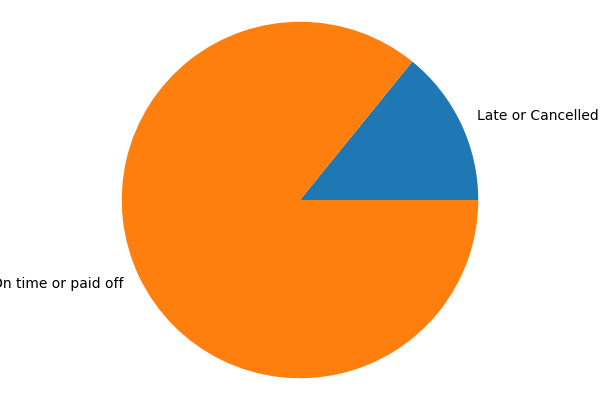

In [103]:
loan_status = accepted_2015[:loan_status]
num_good = 0
num_bad = 0
for i = 1 : length(loan_status)
    if loan_status[i] == "Current" || loan_status[i] == "Fully Paid"
        num_good += 1
    else
        num_bad += 1
    end
end
# println(int_term_of_loan[1:100])
# pie(["36 months", "60 months"],[num_36, num_60])
pie(["Late or Cancelled","On time or paid off"], [num_bad, num_good])

In [104]:
Pkg.add("ScikitLearn")
using ScikitLearn

INFO: 

In [105]:
for pkg in ["ScikitLearn"]
    if !(pkg in keys(Pkg.installed()))
        Pkg.add(pkg)
    end
end

In [106]:
using ScikitLearn
using PyCall
using PyPlot
using ScikitLearn.CrossValidation: train_test_split

In [107]:
@sk_import preprocessing: StandardScaler
@sk_import datasets: (make_moons, make_circles, make_classification)
@sk_import neighbors: KNeighborsClassifier
@sk_import svm: SVC
@sk_import tree: DecisionTreeClassifier
@sk_import ensemble: (RandomForestClassifier, AdaBoostClassifier)
@sk_import naive_bayes: GaussianNB
@sk_import discriminant_analysis: (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)

PyObject <class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>

In [108]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

names = ["RBF SVM"]
classifiers = [SVC(gamma=2, C=1, class_weight="balanced")] # balanced --> using class probabilities from training set as weights


# Influence from: https://github.com/cstjean/ScikitLearn.jl/blob/master/examples/Classifier_Comparison.ipynb

1-element Array{PyCall.PyObject,1}:
 PyObject SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
using ScikitLearn.Utils: meshgrid

In [110]:
# I've collected X and y already (not using all data yet, might have to fix some earlier cells)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7)


# X, y = ds
# X = fit_transform!(StandardScaler(), X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = minimum(X[:, 1]) - .5, maximum(X[:, 1]) + .5
y_min, y_max = minimum(X[:, 2]) - .5, maximum(X[:, 2]) + .5
h = .05
# xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)

# just plot the dataset first
# cm = PyPlot.cm[:RdBu]
# cm_bright = mplc.ListedColormap(["#FF0000", "#0000FF"])
# ax = subplot(length(datasets), length(classifiers) + 1, i)
# # Plot the training points
# ax[:scatter](X_train[:, 1], X_train[:, 2], c=y_train, cmap=cm_bright)
# # and testing points
# ax[:scatter](X_test[:, 1], X_test[:, 2], c=y_test, cmap=cm_bright, alpha=0.6)

# ax[:set_xlim](minimum(xx), maximum(xx))
# ax[:set_ylim](minimum(yy), maximum(yy))
# ax[:set_xticks](())
# ax[:set_yticks](())
# i += 1

# iterate over classifiers
for (name, clf) in zip(names, classifiers)
#     ax = subplot(length(datasets), length(classifiers) + 1, i)
    classifier = ScikitLearn.fit!(clf, X_train, y_train)
    
    name = input("Name of saved model file? ");
    save(name, "classifier", classifier)
    
    scor = score(clf, X_test, y_test)
    println(clf)
    println(score)
    @sprintf("%.2f", scor)
    
    predictions = ScikitLearn.predict(classifier, X_test)
#     println(predictions)
    
    prediction_dict = Dict()
    for prediction in predictions
        prediction_dict[prediction]=get(prediction_dict, prediction, 0) + 1
    end
    
    println(prediction_dict)
    
#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, m_max]x[y_min, y_max].
#     try 
#         # Not implemented for some
#         Z = decision_function(clf, hcat(xx[:], yy[:]))
#     catch
#         Z = predict_proba(clf, hcat(xx[:], yy[:]))[:, 2]
#     end

#     # Put the result into a color plot
#     Z = reshape(Z, size(xx)...)
#     ax[:contourf](xx, yy, Z, cmap=cm, alpha=.8)

#     # Plot also the training points
#     ax[:scatter](X_train[:, 1], X_train[:, 2], c=y_train, cmap=cm_bright)
#     # and testing points
#     ax[:scatter](X_test[:, 1], X_test[:, 2], c=y_test, cmap=cm_bright,
#                alpha=0.6)

#     ax[:set_xlim](minimum(xx), maximum(xx))
#     ax[:set_ylim](minimum(yy), maximum(yy))
#     ax[:set_xticks](())
#     ax[:set_yticks](())
#     ax[:set_title](name)

#     ax[:text](maximum(xx) - .3, minimum(yy) + .3, @sprintf("%.2f", scor),
#             size=15, horizontalalignment="right")
#     i += 1
end
# fig[:subplots_adjust](left=.02, right=.98)





LoadError: [91mUndefVarError: input not defined[39m

In [111]:
# classifier = fit!(LogisticRegression(), X, y)



# Some previous results for SVC(gamma=2, C=1, class_weight="balanced")
# Dict{Any,Any}(Pair{Any,Any}("Fully Paid", 20939),Pair{Any,Any}("Current", 60),Pair{Any,Any}("Charged Off", 1))


In [112]:
# Pkg.add("JLD")
using JLD

In [113]:
# TODO
# need to incorporate class weights when i use SVC - done!
# fix how I split up the data -- (I currently hardcode...)